In [6]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [7]:
auto_mpg = pd.read_csv("auto-mpg.data" , sep='\s+' , header=None, na_values='?')

In [8]:
auto_mpg.head()

,0,1,2,3,4,5,6,7,8
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [9]:
X = auto_mpg.iloc[:,[0,2,3,4,5]]

In [11]:
X.dropna(inplace=True)

C:\Users\Acer\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [12]:
# After scaling , the results as the Dataframe is converted into Array

X_scaled = StandardScaler().fit_transform(X)

In [13]:
X_scaled

array([[-0.69863841,  1.07728956,  0.66413273,  0.62054034, -1.285258  ],
       [-1.08349824,  1.48873169,  1.57459447,  0.84333403, -1.46672362],
       [-0.69863841,  1.1825422 ,  1.18439658,  0.54038176, -1.64818924],
       ...,
       [ 1.09737414, -0.56847897, -0.53247413, -0.80463202, -1.4304305 ],
       [ 0.5842277 , -0.7120053 , -0.66254009, -0.41562716,  1.11008813],
       [ 0.96908753, -0.72157372, -0.58450051, -0.30364091,  1.40043312]])

In [16]:
# This array can be fed to KMeans

km = KMeans(n_clusters=3 , n_init=40 , n_jobs=-1 , random_state=12345)

In [17]:
clusters =  km.fit_predict(X_scaled)

In [18]:
clusters

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 0, 0, 2, 2,
       0, 2, 2, 1, 1, 1, 1, 0, 0, 0, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1,
       2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 2, 2, 0, 2, 0, 2, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 0, 1, 1, 1, 1, 2, 2, 2, 2,
       2, 2, 2, 0, 1, 1, 0, 0, 2, 2, 1, 2, 2, 1, 2, 2, 2, 0, 0, 0, 0, 2,
       2, 2, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 2, 2, 2,
       1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 0, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2,
       2, 2, 2, 0, 0, 0, 2, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2, 0, 0, 0, 0, 2,
       2, 2, 2, 0, 0, 0, 0, 2, 1, 2, 2, 2, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       2, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 0, 2, 0, 2, 0, 0, 0, 0, 2, 2, 2,
       0, 0, 0, 0, 0, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1,
       0, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 1, 1, 1,
       1, 1, 1, 2, 1, 0, 0, 0, 0, 2, 2, 0, 2, 0, 0,

In [19]:
pd.Series(clusters).value_counts()

2    148
0    147
1     97
dtype: int64

## PCA for Visualization

In [20]:
# In PCA , n_components = 2 for 2-D
#          n_components = 3 for 3-D

pca = PCA(n_components=2) 

In [21]:
PCA_output = pca.fit_transform(X_scaled)

In [28]:
pca.explained_variance_ratio_ 

# The first 2 components itself explains more than 90% of the total variance
# So even if i check for 5D the most of the information is obtainable from first 2  

array([0.78535088, 0.14240113])

In [29]:
pca.explained_variance_

array([3.93679724, 0.71382661])

In [30]:
pca.singular_values_

array([39.2337574 , 16.70647199])

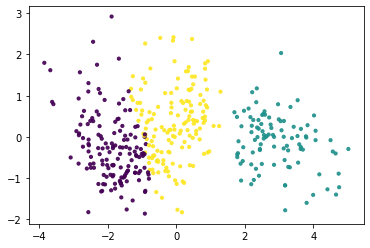

In [38]:
plt.scatter(PCA_output[:,0],PCA_output[:,1], c=clusters , s=10 , alpha=0.9)
plt.show()

# The 3 clusters solution is shown below but 2 cluster would have been more appropriate

In [40]:
X.groupby(by=clusters).mean()

# 0 --> Mileage
# 2 --> Displacement
# 3 --> HorsePower
# 4 --> Weight
# 5 --> Time to accelerate from 0-60

# Cluster 2(Green) is Good but cluster 1 has higher Mileage

,0,2,3,4,5
0,31.615646,103.248299,72.850340,2189.809524,16.751701
1,14.528866,348.020619,161.804124,4143.969072,12.641237
2,21.175676,184.283784,98.297297,2995.581081,16.239865


#### PCA Summary :
Thus we can collate dataset with higher dimensions and can work with less dimension using PCA

## SVD (Singular Value Decomposition)

In [41]:
image_file = plt.imread('svd.png')

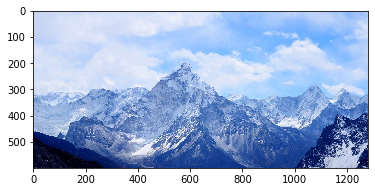

In [42]:
plt.imshow(image_file)
plt.show()

In [43]:
image_file_layer1 = image_file[:,:,0] # SVD cannot be used on a 3D array. So, 2D arrays are required to be extracted first

In [44]:
u , s , v = np.linalg.svd(image_file_layer1 ,full_matrices=False)

In [45]:
from sklearn.preprocessing import MinMaxScaler

In [46]:
scaler = MinMaxScaler()

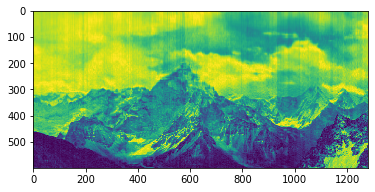

In [47]:
K = 100
new_image_layer1 = (u[:,:K].dot(np.diag(s[:K]))).dot(v[:K,:])
new_image_layer1 = scaler.fit_transform(new_image_layer1)
plt.imshow(new_image_layer1)
plt.show()

0.0 1.0
0.0 1.0
0.0 1.0


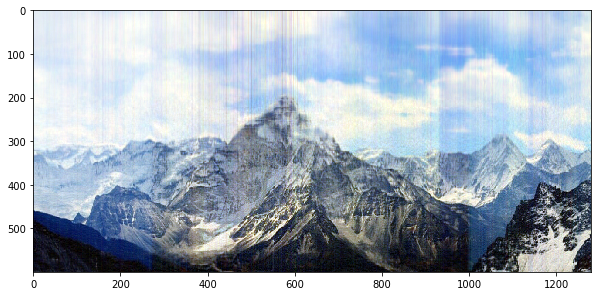

In [48]:
final_image = np.zeros(shape=image_file.shape)
K = 100
for layer in range(3):
  u,s,v = np.linalg.svd(image_file[:,:,layer], full_matrices=False)
  Z = (u[:,:K].dot(np.diag(s[:K]))).dot(v[:K,:])
  Z = scaler.fit_transform(Z)
  Z = np.round(Z,2)
  print(Z.min(), Z.max())
  final_image[:,:,layer] = Z
plt.figure(figsize=(10,5))
plt.imshow(final_image)
plt.show() # Vertical lines are appearing, probably, due to rounding off error.